## Library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import src.utils.plot_settings

## Data Accessing

In [3]:
df = pd.read_csv('data/raw_data.csv')
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df['ID'].nunique()

30000

In [5]:
df.drop(columns=['ID'], inplace=True)

Drop `ID` column because it has no use for prediction or model building.

In [6]:
df.duplicated().sum()

35

In [7]:
df.drop_duplicates(inplace=True)

Drop duplicates from the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29965 non-null  float64
 1   SEX                         29965 non-null  int64  
 2   EDUCATION                   29965 non-null  int64  
 3   MARRIAGE                    29965 non-null  int64  
 4   AGE                         29965 non-null  int64  
 5   PAY_0                       29965 non-null  int64  
 6   PAY_2                       29965 non-null  int64  
 7   PAY_3                       29965 non-null  int64  
 8   PAY_4                       29965 non-null  int64  
 9   PAY_5                       29965 non-null  int64  
 10  PAY_6                       29965 non-null  int64  
 11  BILL_AMT1                   29965 non-null  float64
 12  BILL_AMT2                   29965 non-null  float64
 13  BILL_AMT3                   29965 no

In [9]:
# Rename the target column
df.rename(columns={
    'default.payment.next.month': 'target'
}, inplace=True)

**Separate categorical and numerical columns to perform EDA separatly.**

In [10]:
target = 'target'
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_cols = [i for i in df.columns[:-1] if i not in cat_cols]
cat_cols, num_cols

(['SEX',
  'EDUCATION',
  'MARRIAGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6'],
 ['LIMIT_BAL',
  'AGE',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'])

### DataFrame co-relation before any EDA or Data Preprocessing

In [11]:
corr = df.corr()

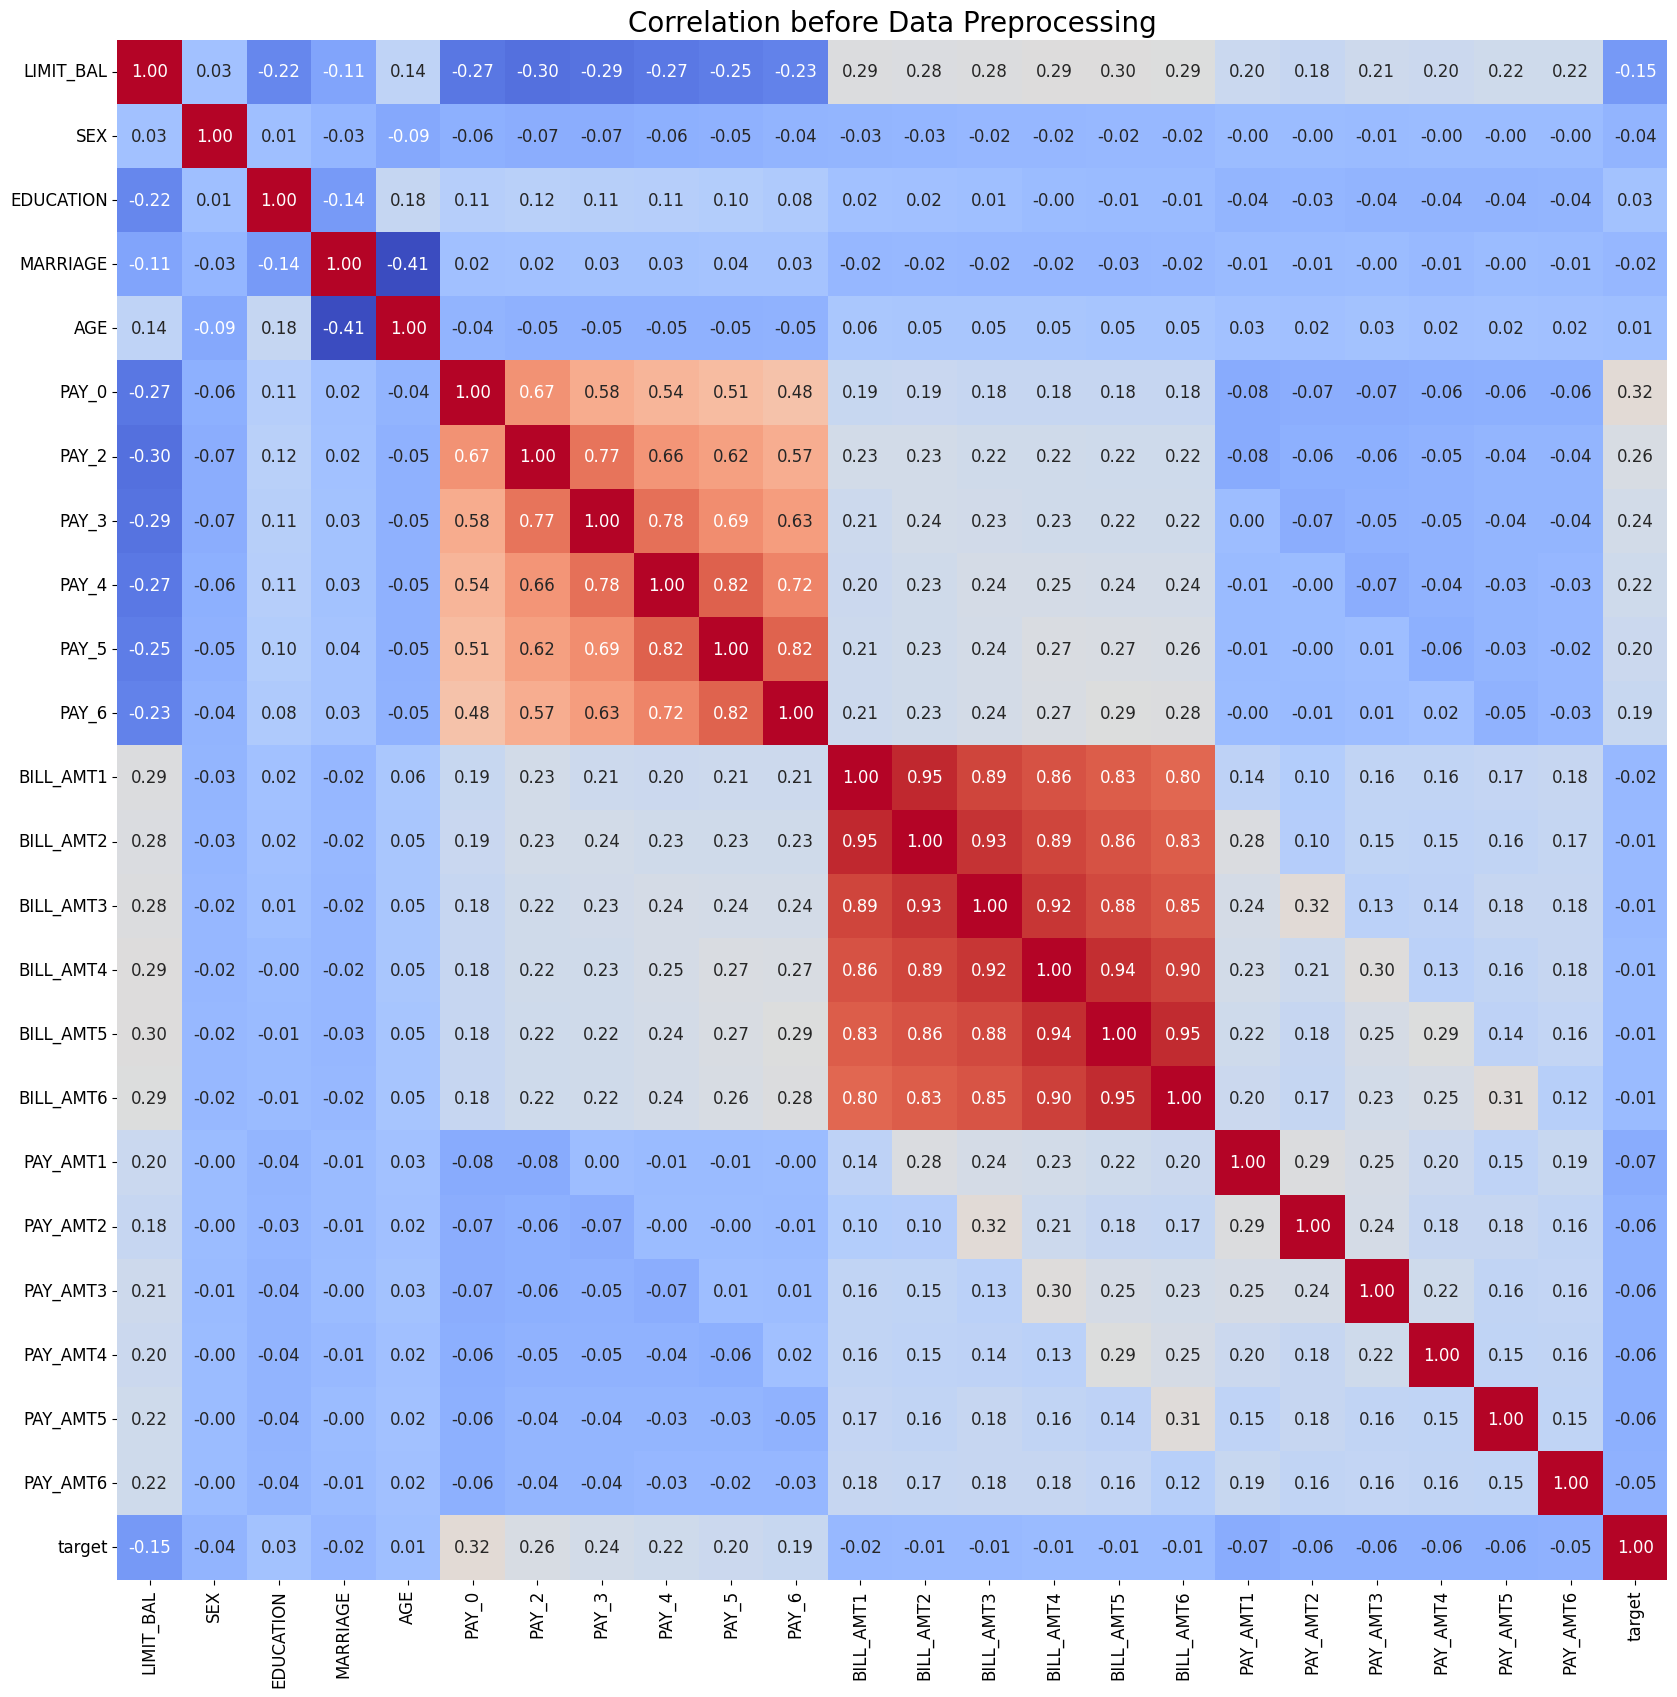

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.title('Correlation before Data Preprocessing', fontsize=20)
plt.savefig('plots/heatmap_before_preprocessing.png')

### Handling `LIMIT_BAL` column

In [13]:
df['LIMIT_BAL'].nunique()

81

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

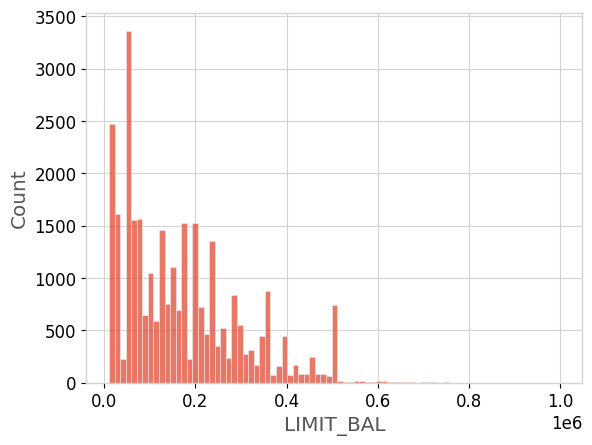

In [14]:
sns.histplot(df['LIMIT_BAL'])

In [15]:
x = df['LIMIT_BAL'].value_counts()[df['LIMIT_BAL'].value_counts() < 10]
x.sort_index()

LIMIT_BAL
16000.0      2
327680.0     1
540000.0     6
570000.0     8
590000.0     6
620000.0     9
630000.0     7
640000.0     7
650000.0     3
660000.0     3
670000.0     3
680000.0     4
690000.0     1
700000.0     8
710000.0     6
720000.0     3
730000.0     2
740000.0     2
750000.0     4
760000.0     1
780000.0     2
800000.0     2
1000000.0    1
Name: count, dtype: int64

`LIMIT_BAL` column has **81 unique values** but while displaying the `value_counts` of it, it seems that I can **convert** this column in a **categorical column** by applying **Binning method**.

In [16]:
bins = list(range(0, 100001, 25000)) + list(range(200000, 500001, 100000)) + [700000, float('inf')]
bins

[0, 25000, 50000, 75000, 100000, 200000, 300000, 400000, 500000, 700000, inf]

In [17]:
df['LIMIT_BAL_bins'] = pd.cut(df['LIMIT_BAL'], bins=bins, right=False, labels=False)
df['LIMIT_BAL_bins'].value_counts()

LIMIT_BAL_bins
4    7390
5    6024
2    4919
6    3034
0    2470
3    2214
1    1840
7    1147
8     896
9      31
Name: count, dtype: int64

In [18]:
pd.cut([240000, 500000, 100000], bins=bins, right=False, labels=False)

array([5, 8, 4])

In [19]:
df['LIMIT_BAL'] = df['LIMIT_BAL_bins']
df.drop(columns=['LIMIT_BAL_bins'], inplace=True)

<Axes: title={'center': 'After Binning'}, xlabel='LIMIT_BAL'>

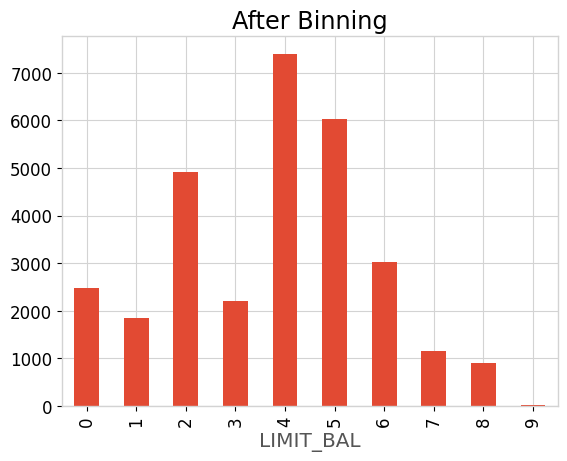

In [20]:
df['LIMIT_BAL'].value_counts().sort_index().plot.bar(title='After Binning')

**Move `LIMIT_BAL` column to `cat_cols` variable from `num_cols`**

In [21]:
cat_cols = cat_cols + [num_cols.pop(0)]
print(cat_cols, num_cols)

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL'] ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


### Vizualize Numerical Columns

In [22]:
len(num_cols), num_cols

(13,
 ['AGE',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'])

In [23]:
def plot_num_cols(
    df: pd.DataFrame,
    num_cols: list[str],
    kind,
    subplots: tuple[int, int],
    title: str | None = None,
    figsize: tuple[int, int] = (12, 8),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    for ax, col in zip(axes.ravel(), num_cols):
        df[col].plot(kind=kind, ax=ax, title=col, figsize=(20, 13))

    plt.tight_layout()
    if savefig_path:
        plt.savefig(savefig_path)

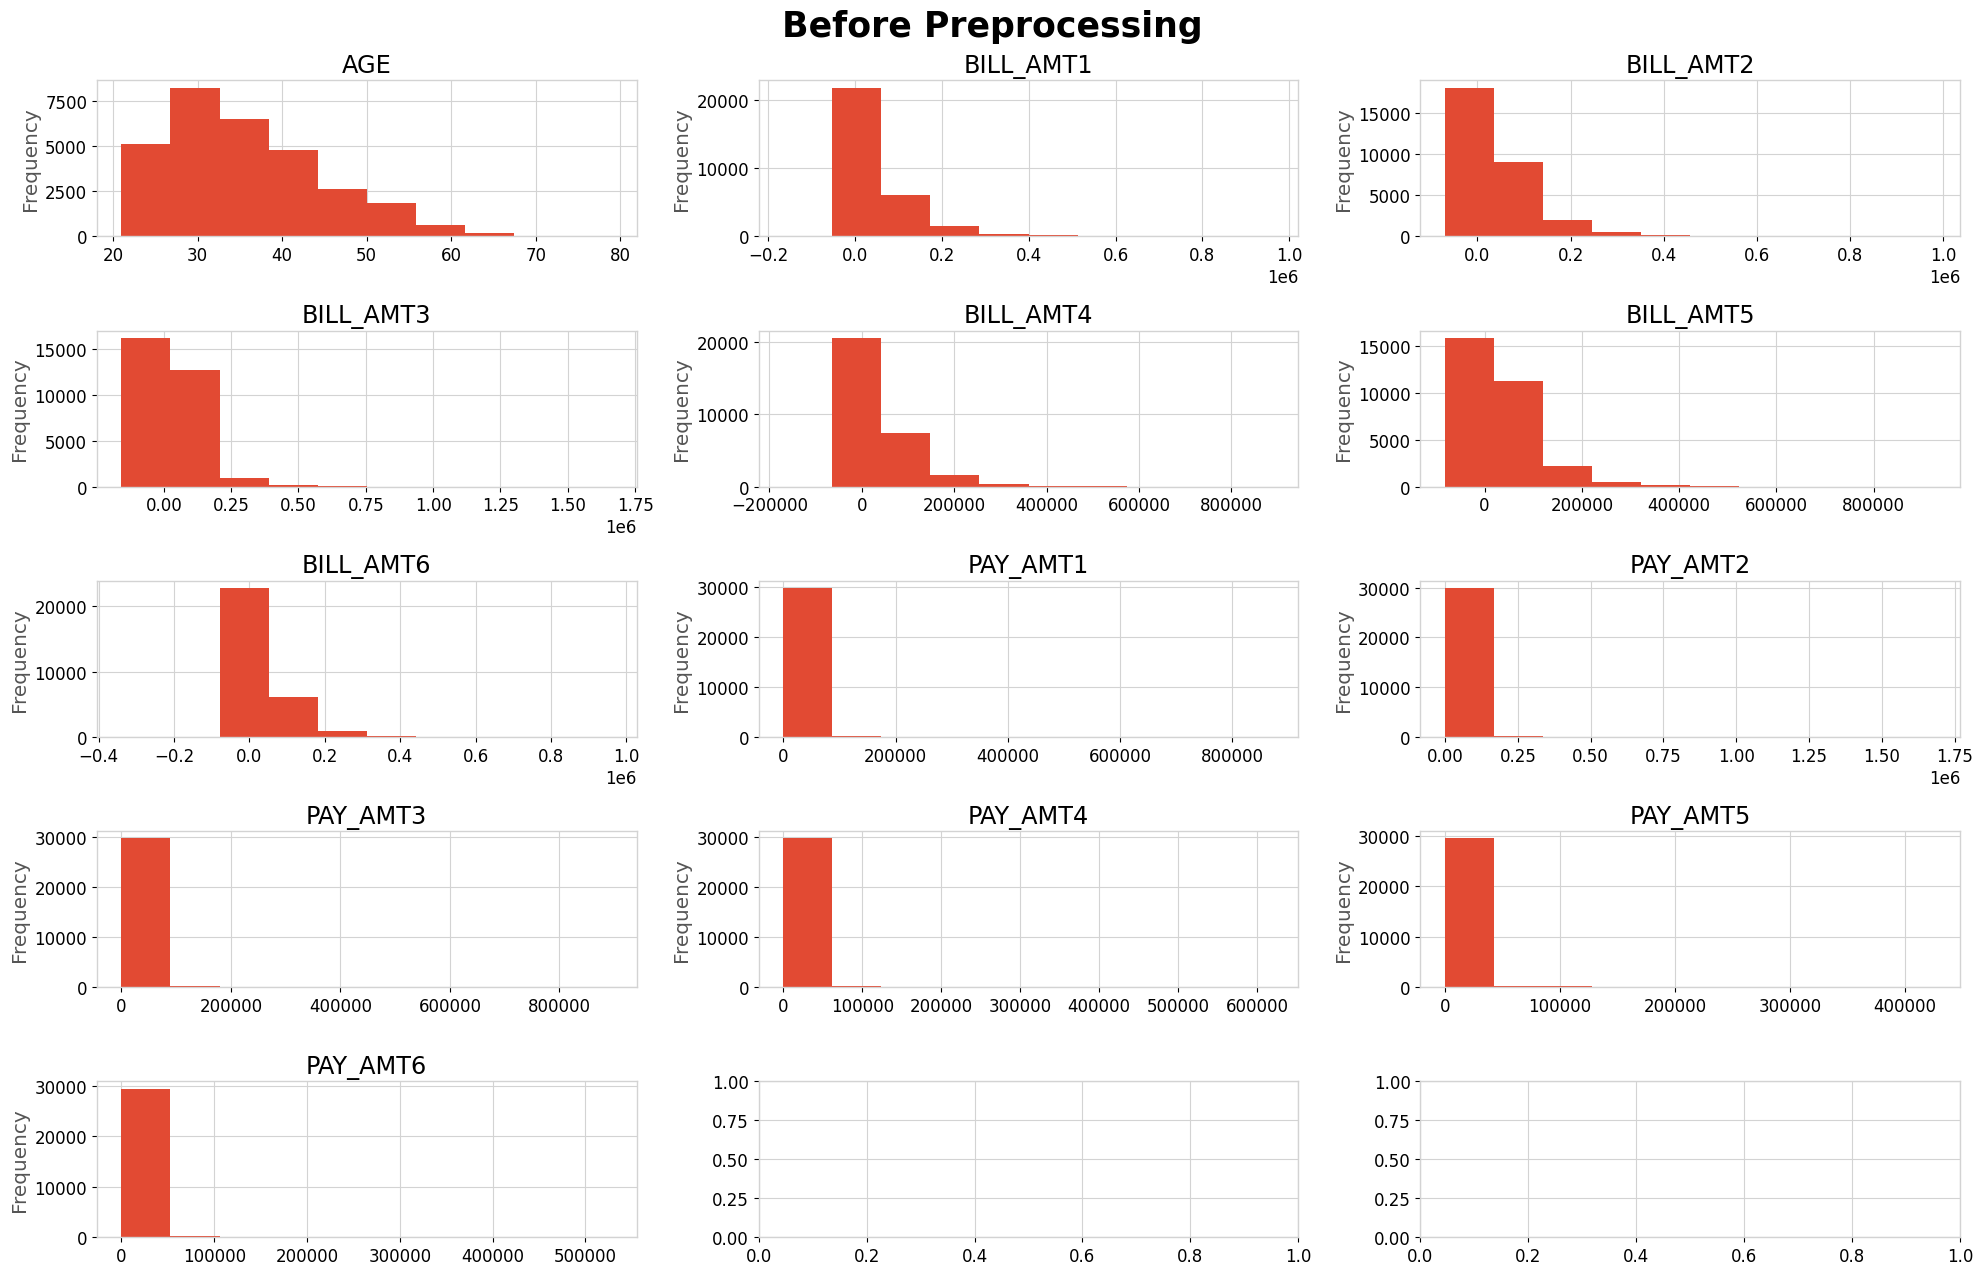

In [24]:
plot_num_cols(df, num_cols, 'hist', (5, 3), 'Before Preprocessing',
              savefig_path='plots/num_cols_before_preprocessing.png')

## Numerical cols

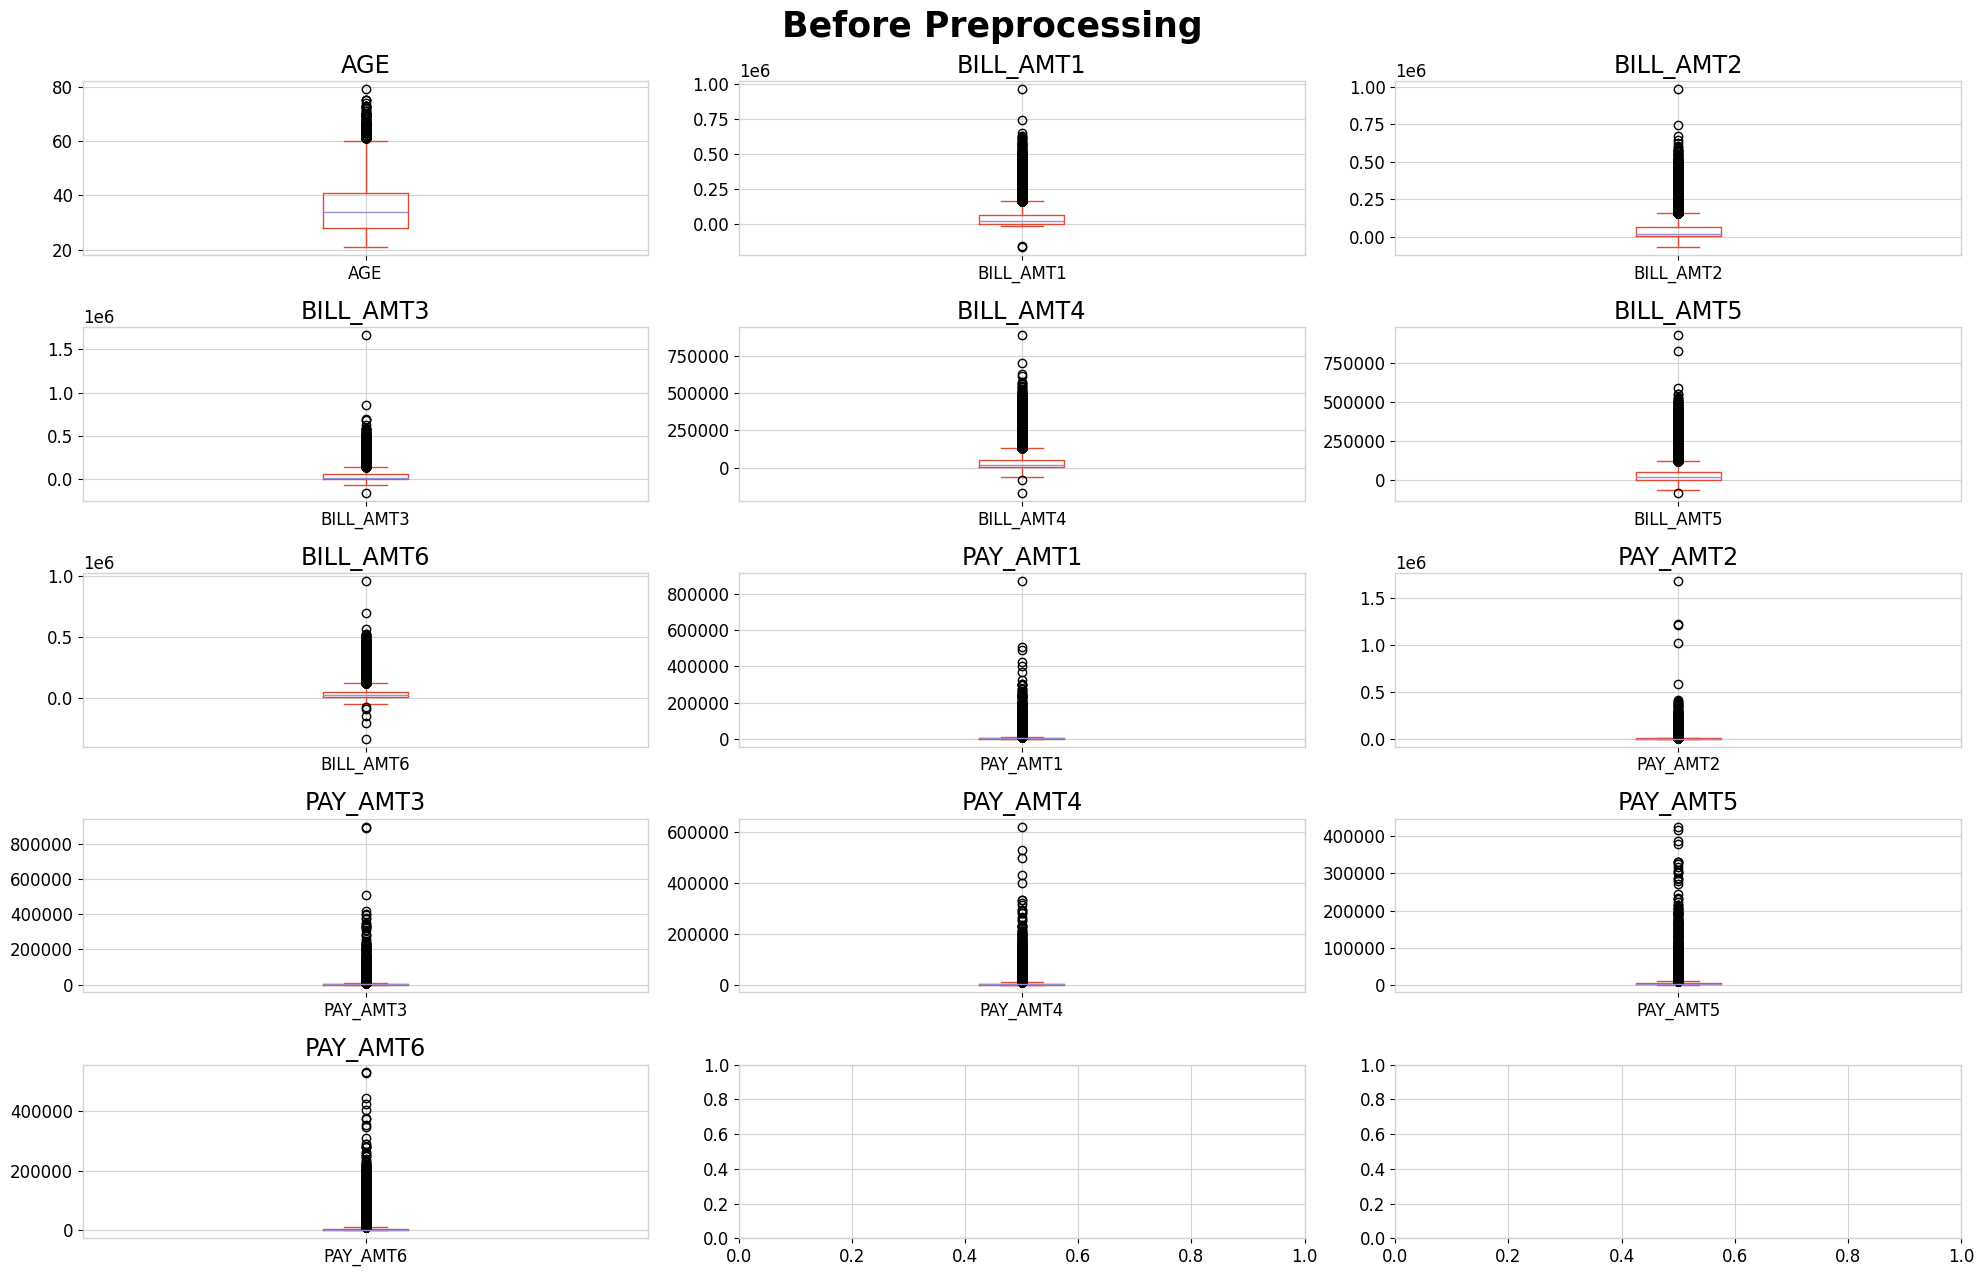

In [25]:
plot_num_cols(df, num_cols, 'box', (5, 3), title='Before Preprocessing')

**Observations:**

- As we can see in the **box plot**, all the numerical columns has outliers.
- As we can see that all columns have different scales so we need to use **quantile** method to handle these outliers.
- We can **clip** the values in certain **quantile range**.

In [26]:
df[num_cols].describe()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000
mean,35.487969,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014
std,9.219459,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864
min,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000
50%,34.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,41.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000
max,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [27]:
df[num_cols].describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
AGE,35.487969,9.219459,21.0,79.0
BILL_AMT1,51283.009778,73658.132403,-165580.0,964511.0
BILL_AMT2,49236.366294,71195.567392,-69777.0,983931.0
BILL_AMT3,47067.916069,69371.352323,-157264.0,1664089.0
BILL_AMT4,43313.329885,64353.514373,-170000.0,891586.0
BILL_AMT5,40358.334390,60817.130623,-81334.0,927171.0
BILL_AMT6,38917.012281,59574.147742,-339603.0,961664.0
PAY_AMT1,5670.099316,16571.849467,0.0,873552.0
PAY_AMT2,5927.983180,23053.456645,0.0,1684259.0
PAY_AMT3,5231.688837,17616.361124,0.0,896040.0


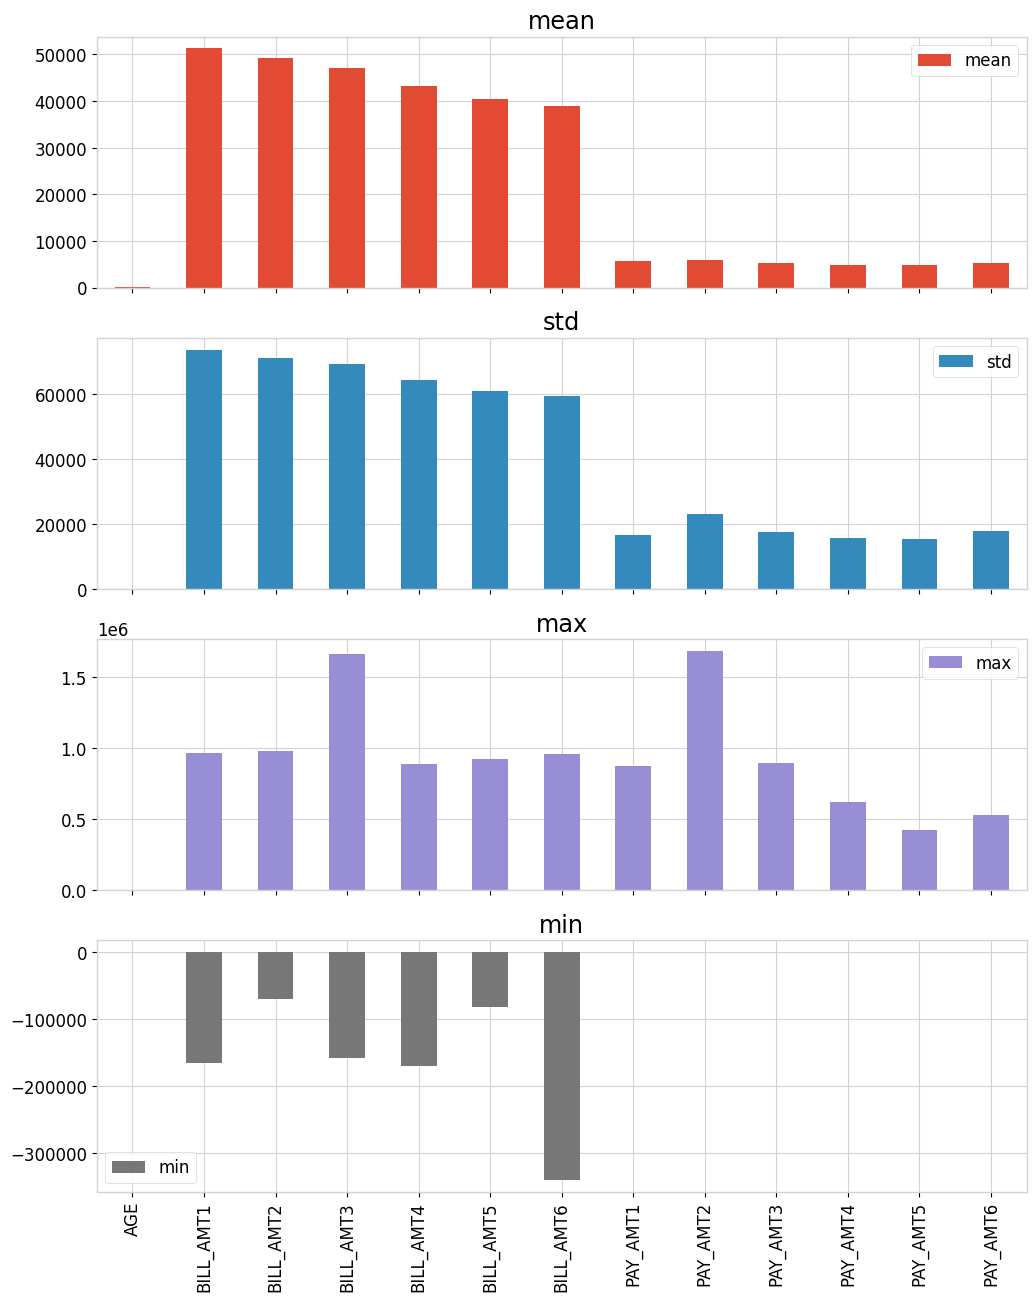

In [28]:
(
    df[num_cols].describe()
    .T[['mean', 'std', 'max', 'min']]
    .plot(kind='bar', subplots=True, figsize=(12, 15))
)
plt.show()

### Clip all numerical columns

In [29]:
df[num_cols].quantile([.15, .95]).T

,0.15,0.95
AGE,26.0,53.0
BILL_AMT1,822.0,201303.8
BILL_AMT2,512.2,194889.6
BILL_AMT3,390.0,187901.0
BILL_AMT4,366.6,174469.8
BILL_AMT5,250.6,165805.6
BILL_AMT6,0.0,161932.0
PAY_AMT1,0.0,18447.2
PAY_AMT2,0.0,19030.8
PAY_AMT3,0.0,17602.6


In [30]:
for col in num_cols:
    df[col] = df[col].clip(
        lower=df[col].quantile(0.15),
        upper=df[col].quantile(0.95)
    )

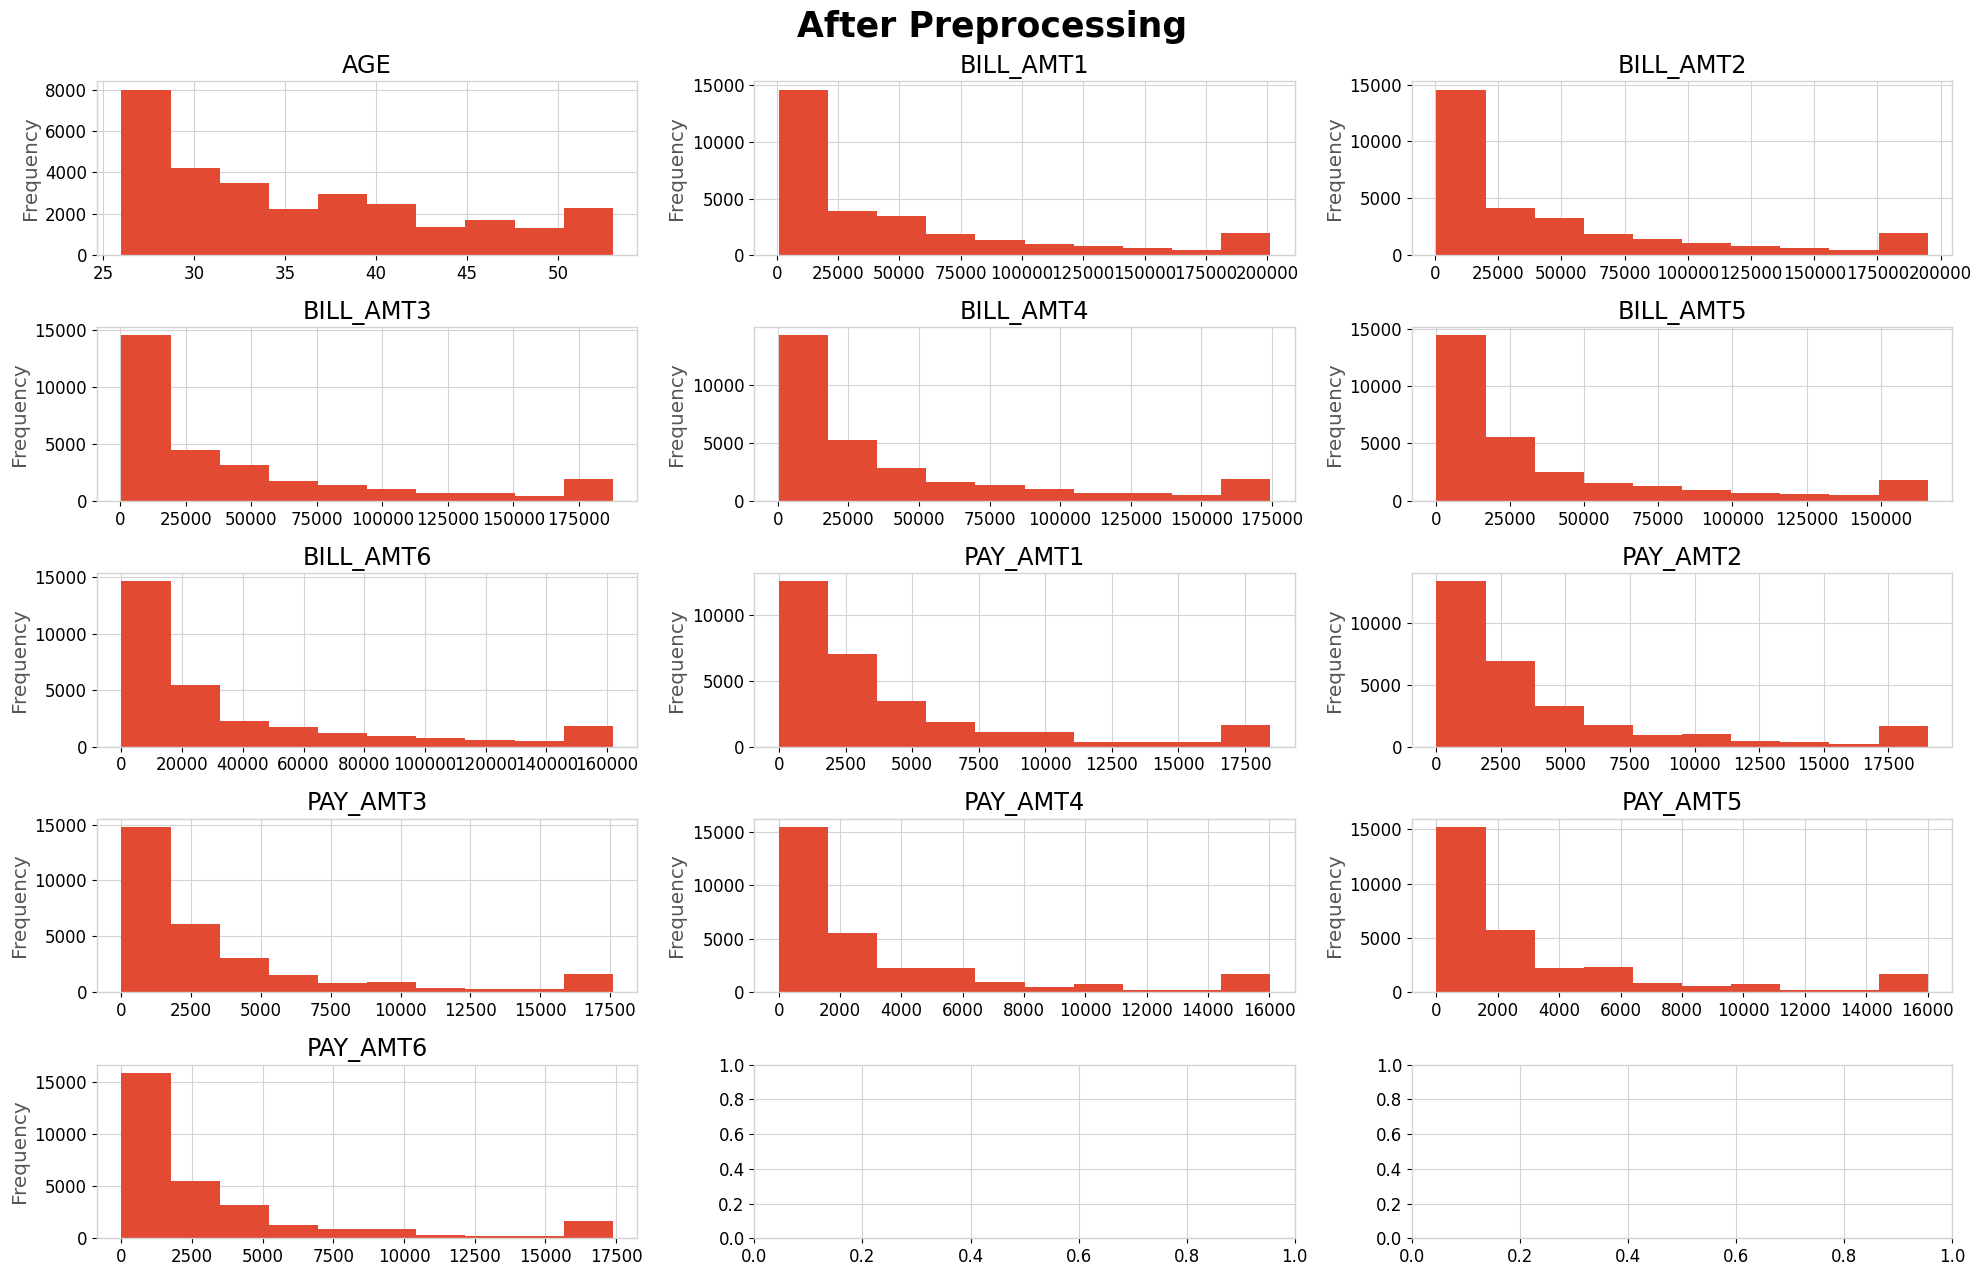

In [32]:
plot_num_cols(df, num_cols, 'hist', (5, 3), 'After Preprocessing',
              savefig_path='plots/num_cols_after_preprocessing.png')

## Categorical Columns

In [33]:
print(cat_cols)

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL']


In [34]:
def plot_cat_cols(
    df: pd.DataFrame,
    cat_cols: list[str],
    kind,
    subplots: tuple[int, int],
    title: str | None = None,
    figsize = (15, 10),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    plt.tight_layout()

    for ax, col in zip(axes.ravel(), cat_cols):
        df[col].value_counts().sort_index().plot(kind=kind, ax=ax)
    
    if savefig_path:
        plt.savefig(savefig_path)

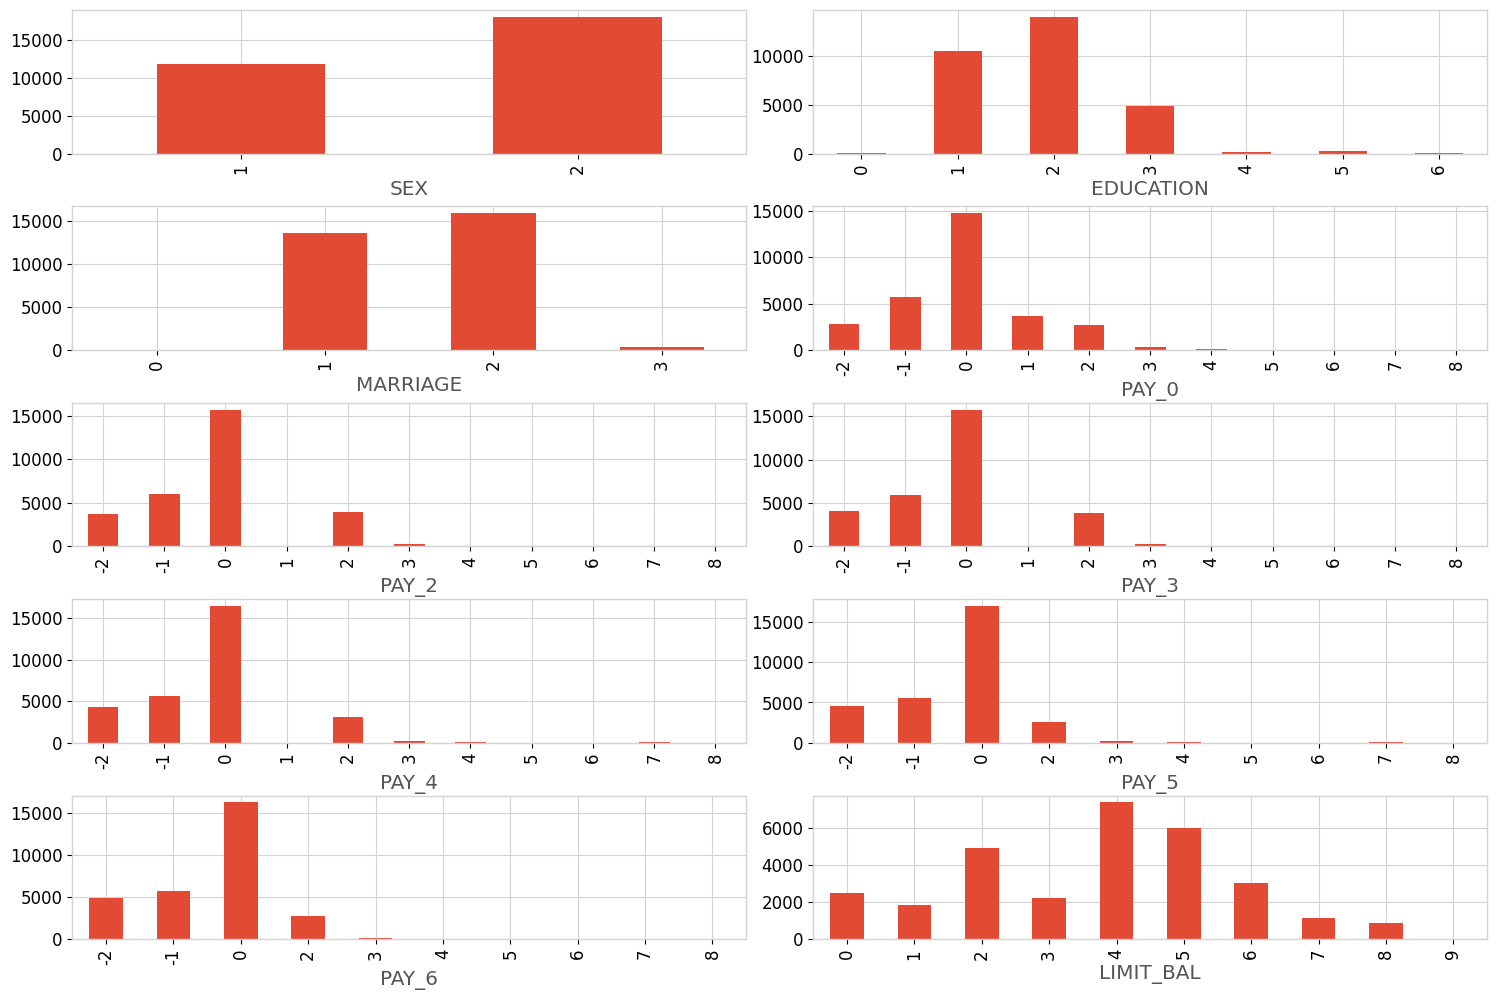

In [35]:
plot_cat_cols(df, cat_cols, 'bar', (5, 2), savefig_path='plots/cat_cols_before_preprocessing.png')

## DataFrame co-relation

In [36]:
corr = df.corr()

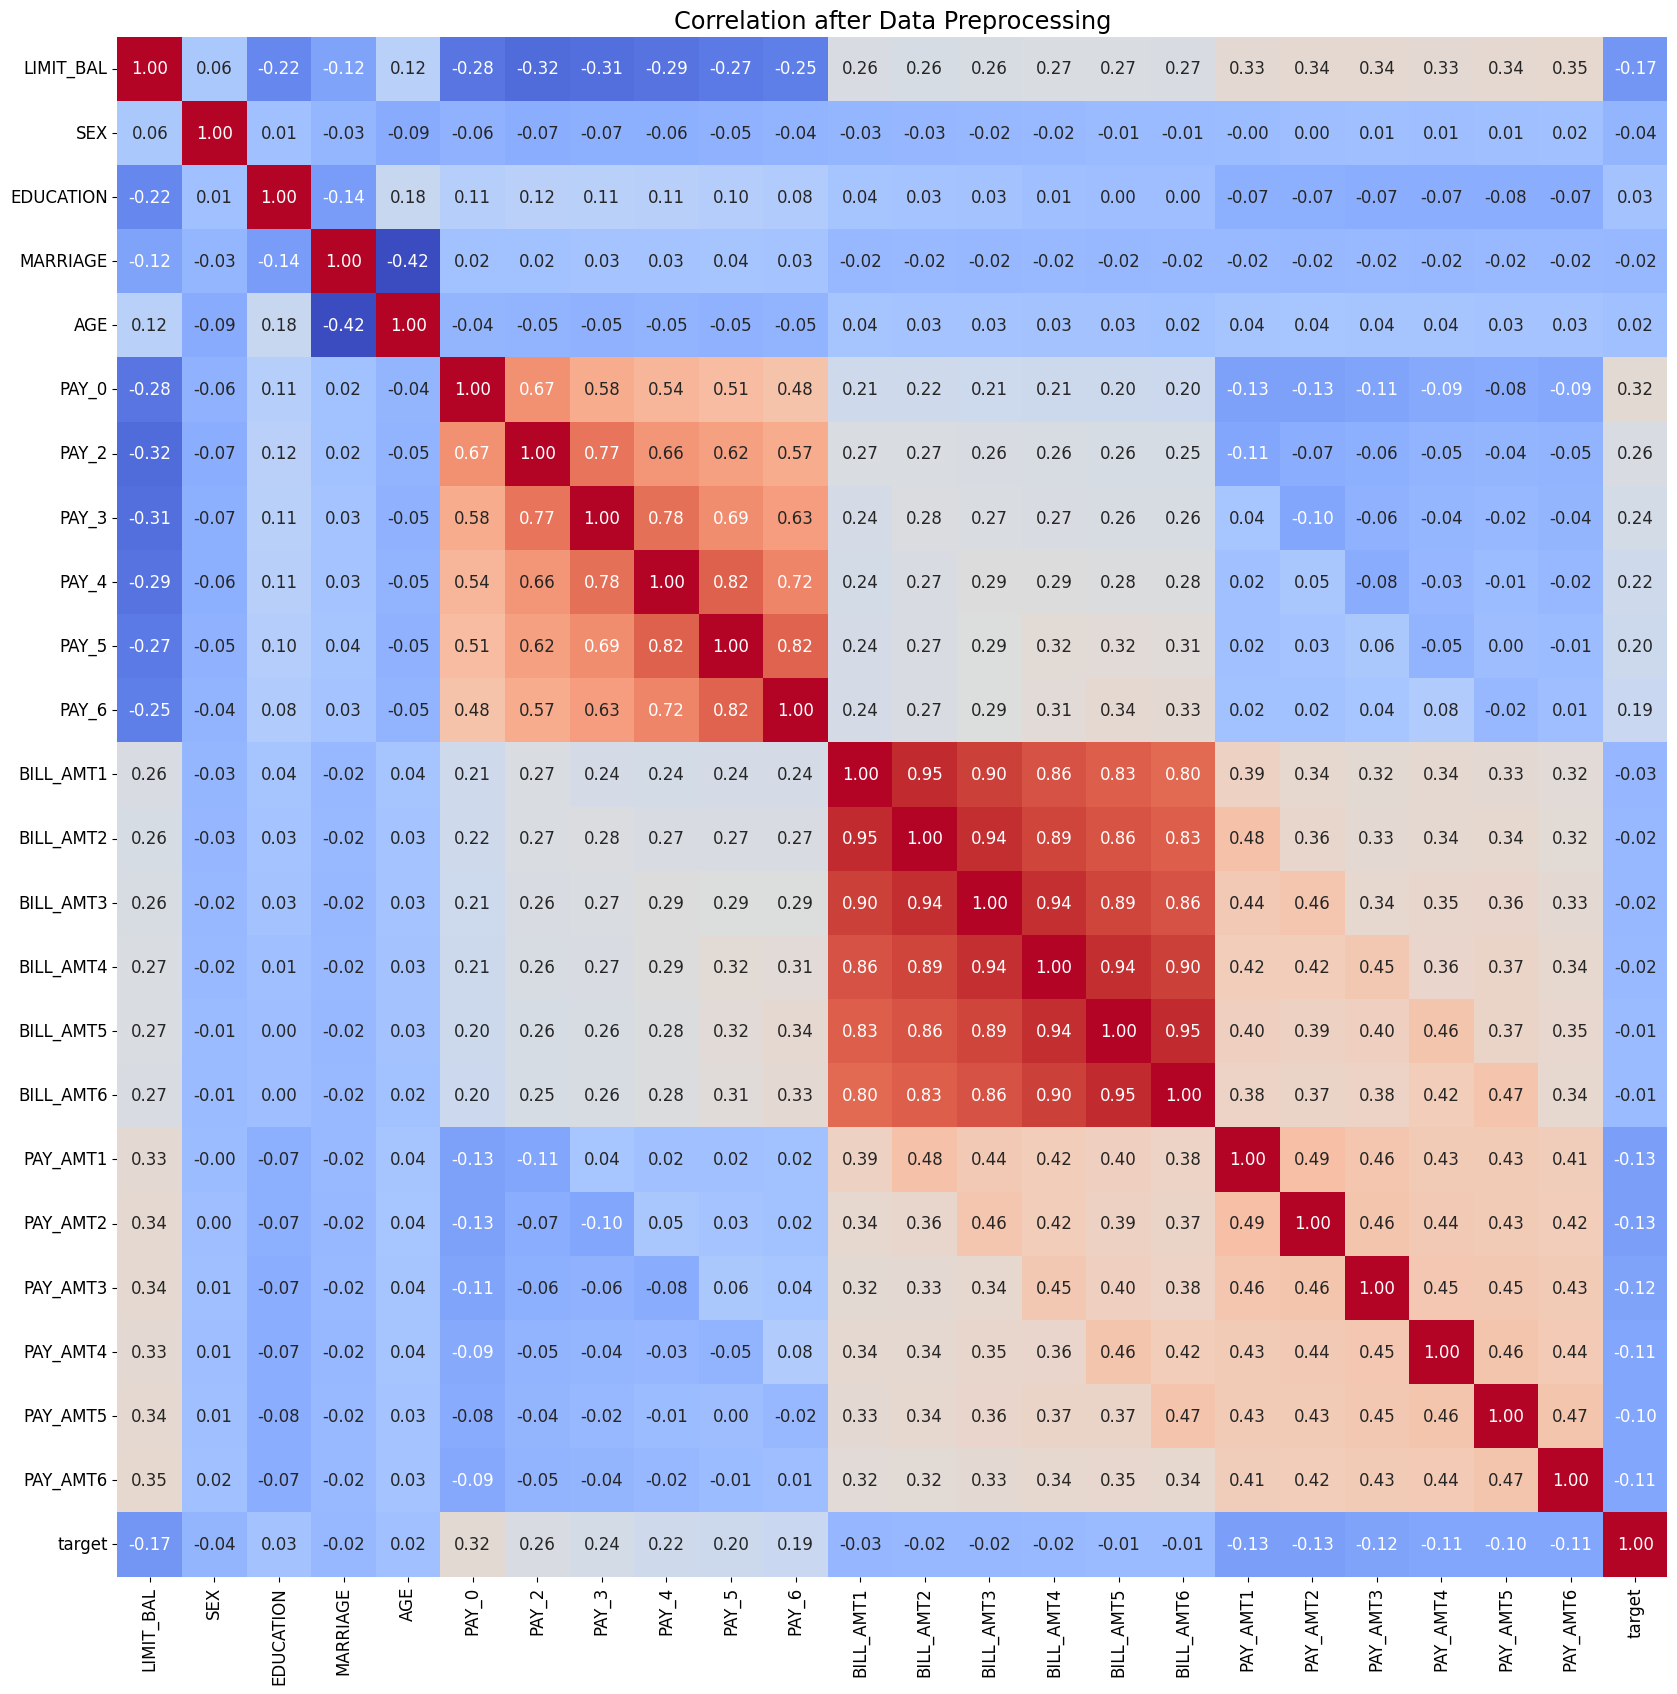

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.title('Correlation after Data Preprocessing')
plt.savefig('plots/heatmap_after_preprocessing.png')